In [1]:
#import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta',
          'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue','xkcd:scarlet']
import warnings
warnings.filterwarnings('ignore')

In [24]:
#loading the image data
image_path = (r"C:\Users\Admin\Downloads\nature.jpg")
image = cv2.imread(image_path)

In [25]:
#check the shape of image
image.shape

(1000, 1600, 3)

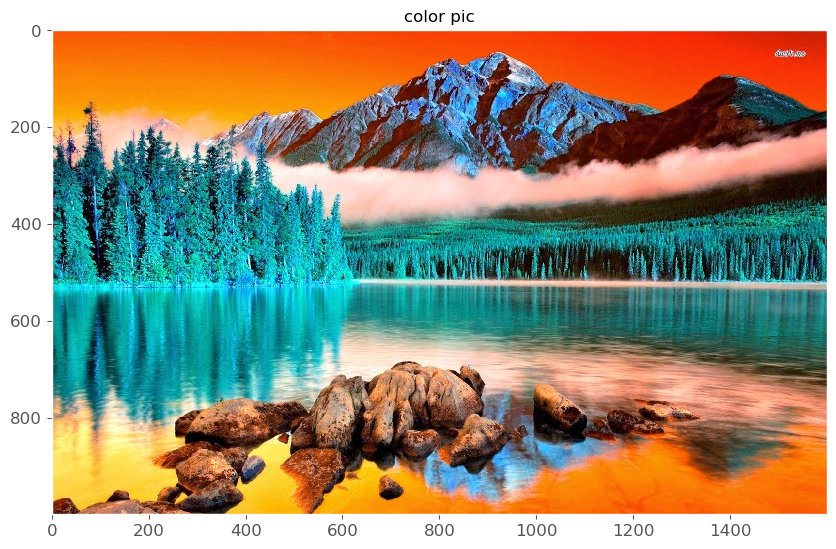

In [26]:
#visualize the uploded image
plt.imshow(image)
plt.title('color pic')
plt.show()

In [27]:
#build a function to segment image colors to rows x columns x channels
#aplly kmeans algorithm to the colors
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [28]:
#kmeans algorithm
image = get_image(image_path)
number_of_colors = 10
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [29]:
#setting the number of colors to 10 
counts = Counter(labels)
center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

([<matplotlib.patches.Wedge at 0x27a0e4e9370>,
 [Text(1.0481613656435762, 0.33370308894613737, '#71a7e7'),
  Text(0.6353758210151775, 0.8979407363903752, '#c4b919'),
  Text(-0.05279439067767041, 1.0987323387945644, '#0a88f9'),
  Text(-0.6647636562849322, 0.8764070294575967, '#8b8518'),
  Text(-1.025847585063176, 0.397034925693005, '#c0d1f0'),
  Text(-1.0932955270326128, -0.12126372322538, '#101934'),
  Text(-0.8217755123393395, -0.7312215856492588, '#4a5e84'),
  Text(-0.1233780322219692, -1.0930589467933716, '#b2a279'),
  Text(0.6491436109470876, -0.8880386097274017, '#0548f4'),
  Text(1.0639707710054331, -0.2792242798291439, '#55521c')])

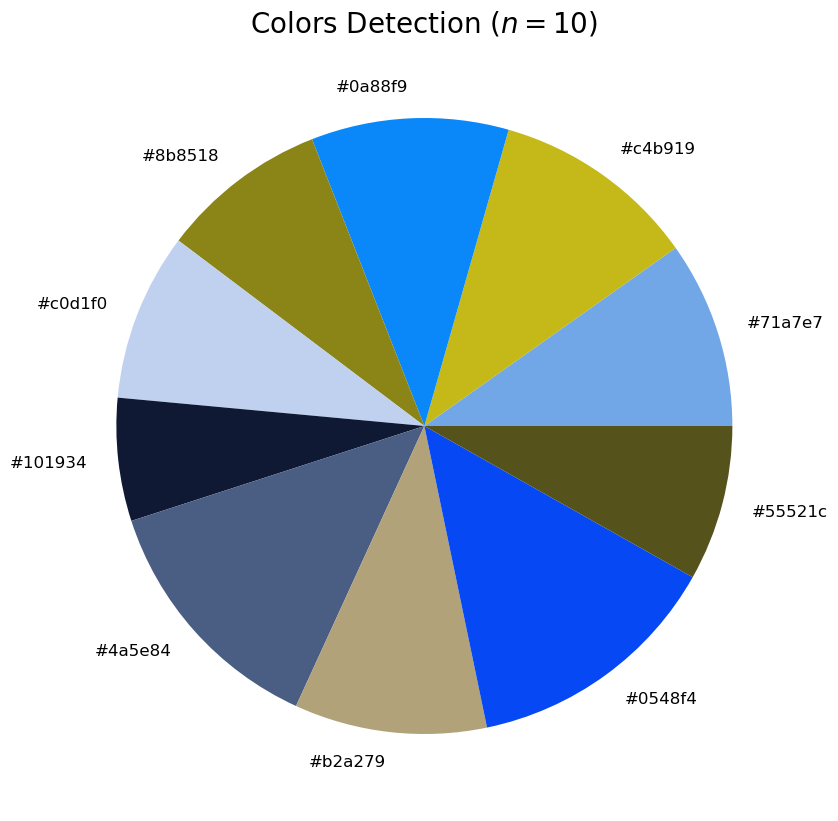

In [30]:
#plotting the visuals 
plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [31]:
def inthreshold(array):
    count = 0
    for i in range(len(array)):
        if array[i]>=-12 and array[i]<=12:
            count=count+1
    return count

def show_color(col_index):
    color = col_index
    sub_image = (image-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            #print(e.shape)
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = image.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.subplot(1,3,3)
    #pwargs = {'interpolation':'nearest'}
    plt.imshow(color_arr)

In [32]:
def show_color(col_index):
    color = col_index
    sub_image = (image-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            #print(e.shape)
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = image.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.subplot(1,3,3)
    #pwargs = {'interpolation':'nearest'}
    plt.imshow(color_arr)

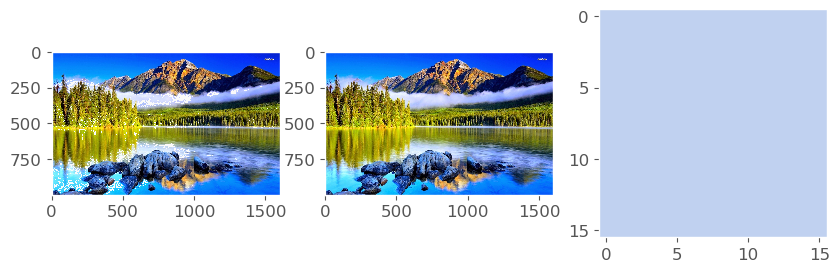

In [33]:
show_color(4)

In [34]:
#converting rgb image in integer values
for i in range (len(rgb_colors)):
    rgb_colors[i] = rgb_colors[i].astype(int)

In [35]:
#break image into smaller squares for proper identification of colors using the functions below
def square_maker():
    inp_img = image
    h = int(inp_img.shape[0])
    step_h = int(h/10)
    w = int(inp_img.shape[1])
    step_w = int(w/10)
    X = np.arange(0,h+step_h,step_h)
    Y = np.arange(0,w+step_w,step_w)
    squares = [inp_img[0:step_h,0:step_w]]
    for i in range(0,len(X)-1):
        for j in range(0,len(Y)-1):
            squares.append(inp_img[X[i]:X[i+1],Y[j]:Y[j+1]])
    return np.array(squares)[1::]

In [36]:
#pick the color that in average is closer to 0 than the others using the function below
def color_computing(array):
    DIFF = []
    squared_image = square_maker()
    for square in squared_image:
        DIFF_COLOR = []
        for color in range(len(rgb_colors)):
            diff = np.abs(square - rgb_colors[color])
            DIFF_COLOR.append(diff.mean())
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)

In [37]:
#plot the best colors using the funtion below
def best_color_plot(selected_slice):
    plt.subplot(1,2,1)
    plt.title('Retrieved Color')
    plt.imshow((np.zeros((16,16,3))+rgb_colors[color_computing(image)[selected_slice].argmin()]).astype(int))
    plt.subplot(1,2,2)
    plt.title('Selected Square:'+ str(selected_slice))
    plt.imshow(square_maker()[selected_slice])

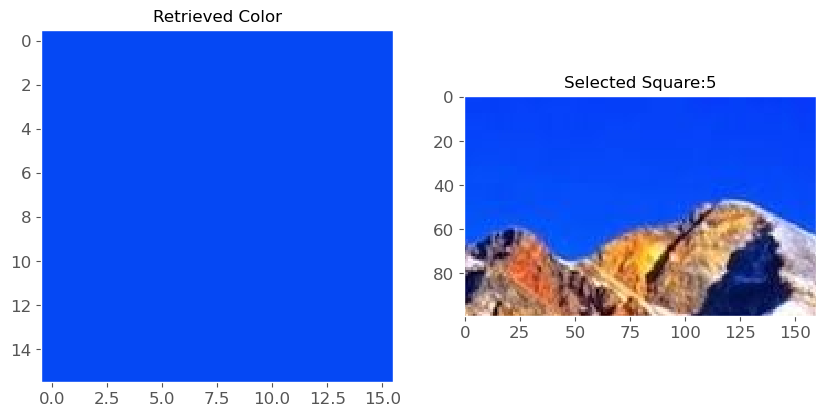

In [38]:
best_color_plot(5)

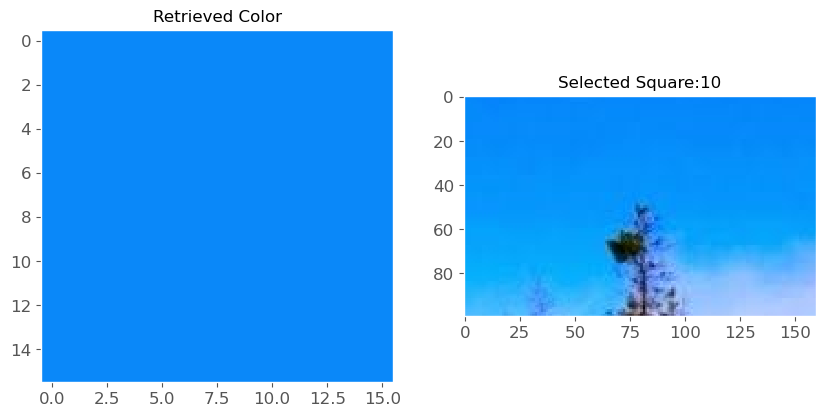

In [39]:
best_color_plot(10)

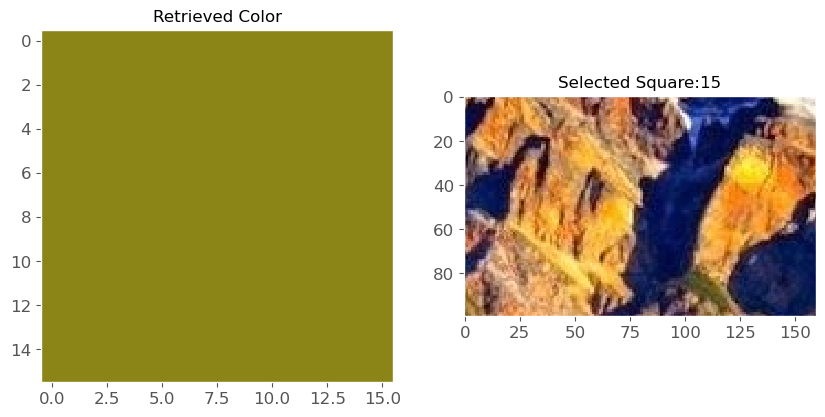

In [40]:
best_color_plot(15)

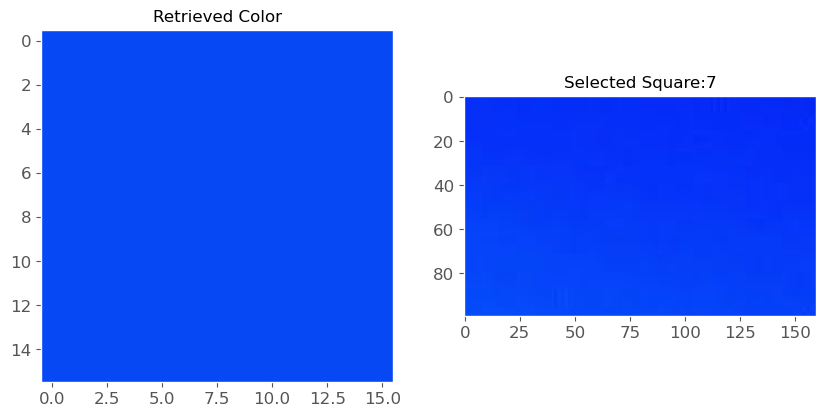

In [41]:
best_color_plot(7)

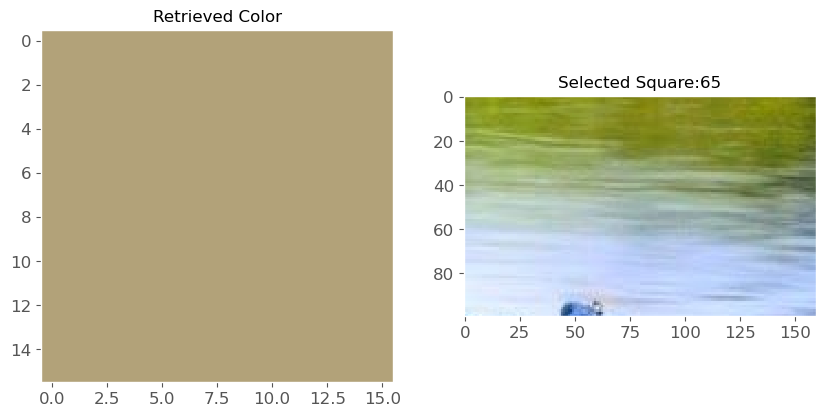

In [42]:
best_color_plot(65)

In [43]:
def build_summary():
    results = color_computing(image)
    cols = ['Square Number'] + hex_colors
    sorted_results = pd.DataFrame(columns= cols)
    k=0

    for r in results:
        d = {'Square Number':int(k)}
        for c in range(len(hex_colors)):
            d[hex_colors[c]] = r[c]*100/r.sum()
        sorted_results = sorted_results.append(d,ignore_index=True)
        k=k+1
    sorted_results['Square Number'] = sorted_results['Square Number'].astype(int)
    return sorted_results

In [44]:
summary_df = build_summary()

In [45]:
summary_df.head(20)

,Square Number,#71a7e7,#c4b919,#0a88f9,#8b8518,#c0d1f0,#101934,#4a5e84,#b2a279,#0548f4,#55521c
0,0,7.074097,18.820088,1.287814,14.688187,11.359279,11.187824,7.790626,13.578392,1.648487,12.565204
1,1,7.131329,18.865121,1.356526,14.737272,11.412061,11.095034,7.732261,13.628869,1.570544,12.470983
2,2,7.259753,18.952546,1.508489,14.839120,11.525528,10.886652,7.631247,13.734589,1.396213,12.265863
3,3,7.468161,19.072160,1.777009,14.989971,11.701542,10.523254,7.486025,13.893828,1.109202,11.978847
4,4,7.845040,18.735261,2.649825,14.824832,11.927300,10.024327,7.407877,13.716403,1.359146,11.509988
5,5,8.856595,15.288845,6.576693,12.502723,11.829266,10.064891,7.653627,11.315086,5.431348,10.480925
6,6,8.036988,18.480913,3.283539,14.875471,11.800968,9.412467,7.708016,13.620476,1.365090,11.416072
7,7,8.252623,18.960702,3.021265,15.193690,12.159154,8.284569,7.799187,14.182178,0.754832,11.391799
8,8,8.336485,18.770466,3.478297,15.047236,12.295122,7.765084,7.771209,14.059857,1.171010,11.305234
9,9,8.368031,18.302011,4.266555,14.697206,12.439718,7.550682,7.600986,13.592190,2.011608,11.171013
